#Convolución
'''
Se refiere a la interacción enrte 2 funciones para generar una tercera.

Para el caso de tratamiento de imágenes, la señal de entrada será la imagen. Y el kernel será un filtro.

- Stride = de cuánto en cuánto se mueve el Kernel,
Los parámetros obtenidos por el Kernel son pasados pon una función de activación (típicamente ReLu)

#Pooling layers
La capa de pooling es una operación que reduce el tamaño de las imágenes en las redes neuronales convolucionales (CNN). Se utiliza para reducir la cantidad de cálculos y parámetros en la red.
- Se aplica entre dos capas de convolución.
- Recibe las feature maps formadas en la salida de la capa de convolución.
- Reduce el tamaño de las imágenes y conserva sus características más esenciales.
- Se utiliza para controlar el sobreajuste.
- Mejora la eficiencia computacional.
- Extrae características dominantes mediante la agregación de entradas cercanas.

#Conectando todo a una Fullty Connected Layer
Una vez extrído las características más importantes haciendo uso e max pulling, la matriz generada se aplana y es usada como la capa de entrada de una red fully connected. Estas suelen entrenarse más rápido que las feed foward.'''

In [ ]:
import tensorflow as tf
if tf.test.gpu_device_name():
  print(f'Se encontro el siguiente GPU: {tf.test.gpu_device_name()}')
else:
  print('aqui no hay gpus')

Se encontro el siguiente GPU: /device:GPU:0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/LIDCI/5/PROCESAMIENTO DE LENGUAJE NATURAL/bbc (1).csv')
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


<Axes: xlabel='category'>

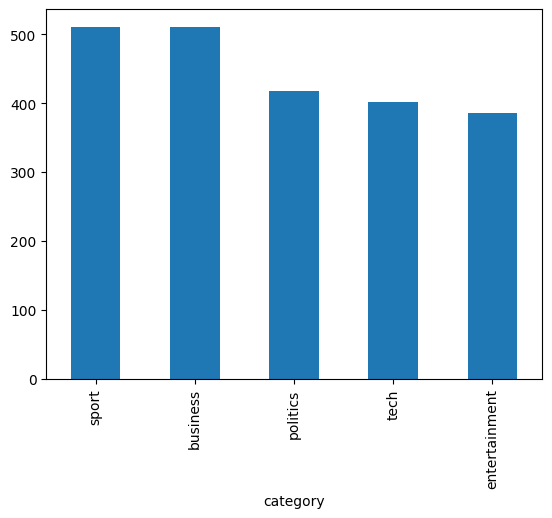

In [ ]:
df['category'].value_counts().plot(kind='bar')

In [ ]:
mapper = {
    'tech':0,
    'business':1,
    'sport':2,
    'entertainment':3,
    'politics':4
}
df['category'] = df['category'].map(mapper)
df.head()

,category,text
0,0,tv future in the hands of viewers with home th...
1,1,worldcom boss left books alone former worldc...
2,2,tigers wary of farrell gamble leicester say ...
3,2,yeading face newcastle in fa cup premiership s...
4,3,ocean s twelve raids box office ocean s twelve...


In [ ]:
target_names = ['tech', 'business', 'sport', 'entertainment', 'politics']

In [ ]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 3.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
nlp = spacy.load('en_core_web_lg')
import re
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
stopwords_en = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def vectorize(text):
  texto = text.lower()
  texto = re.sub(r'([^0-9A-Za-z \t])','',texto)
  texto = word_tokenize(texto)
  texto = [palabra for palabra in texto if palabra not in stopwords_en]
  texto = [lemmatizer.lemmatize(palabra) for palabra in texto]
  texto = ' '.join(texto)
  texto = nlp(texto).vector
  return texto

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
from tqdm import tqdm
tqdm.pandas()
df['vector'] = df['text'].progress_apply(vectorize)
df.head(10)

100%|██████████| 2225/2225 [01:46<00:00, 20.82it/s]


,category,text,vector
0,0,tv future in the hands of viewers with home th...,"[-0.042347796, 0.16773716, -0.03543683, -0.054..."
1,1,worldcom boss left books alone former worldc...,"[-0.10702137, 0.17894086, -0.035277642, 0.0389..."
2,2,tigers wary of farrell gamble leicester say ...,"[0.011730123, 0.17346485, -0.067162946, -0.010..."
3,2,yeading face newcastle in fa cup premiership s...,"[0.1716614, 0.023610156, 0.012125467, 0.016415..."
4,3,ocean s twelve raids box office ocean s twelve...,"[0.041796617, 0.069736026, 0.034744512, -0.095..."
5,4,howard hits back at mongrel jibe michael howar...,"[-0.16570681, 0.18010028, 0.0035167062, -0.024..."
6,4,blair prepares to name poll date tony blair is...,"[-0.09373385, 0.12762137, 0.069787696, -0.0245..."
7,2,henman hopes ended in dubai third seed tim hen...,"[0.074630536, 0.17608719, 0.040954195, -0.0024..."
8,2,wilkinson fit to face edinburgh england captai...,"[-0.011366101, 0.19215202, -0.036958788, -0.01..."
9,3,last star wars not for children the sixth an...,"[-0.068983935, 0.08661762, 0.051102243, -0.044..."


In [ ]:
from sklearn.model_selection import train_test_split
X = df['vector']
X = np.concatenate(X, axis=0).reshape(-1, 300)
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.80,random_state=101)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

early_stopping = EarlyStopping(monitor='val_loss',
                              patience=5,
                              restore_best_weights=True)

In [ ]:
y_train = to_categorical(y_train, 5)
y_test = to_categorical(y_test,5)

In [ ]:
#Solo para CNN!!
X_train =   X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test =   X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
X_train.shape

(1780, 300, 1)

In [ ]:
model = Sequential()
model.add(Conv1D(35,2, activation='relu', input_shape=X_train[0].shape))
model.add(MaxPool1D(5))
model.add(Flatten())
model.add(Dense(35, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs = 100,
                    validation_data=(X_test,y_test),
                    callbacks=[early_stopping])

Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.3997 - loss: 1.3523 - val_accuracy: 0.9056 - val_loss: 0.3555
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8006 - loss: 0.5538 - val_accuracy: 0.9416 - val_loss: 0.2138
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8235 - loss: 0.4513 - val_accuracy: 0.9303 - val_loss: 0.2738
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8203 - loss: 0.4457 - val_accuracy: 0.9191 - val_loss: 0.2591
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8383 - loss: 0.4167 - val_accuracy: 0.9326 - val_loss: 0.2237
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8325 - loss: 0.4056 - val_accuracy: 0.9483 - val_loss: 0.1471
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8557 - loss: 0.3396 - val_accuracy: 0.9483 - val_loss: 0.1560
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8565 - loss: 0.3638 - val_accuracy: 0.9461 - 

In [ ]:
metrics = pd.DataFrame(history.history)
metrics

,accuracy,loss,val_accuracy,val_loss
0,0.552809,1.072457,0.905618,0.355535
1,0.799438,0.536636,0.941573,0.213828
2,0.819101,0.447413,0.930337,0.273753
3,0.828090,0.431008,0.919101,0.259142
4,0.838202,0.411671,0.932584,0.223684
5,0.839888,0.391163,0.948315,0.147058
6,0.855618,0.348623,0.948315,0.156040
7,0.850000,0.385538,0.946067,0.165503
8,0.853371,0.362475,0.948315,0.170995
9,0.866854,0.335451,0.957303,0.139267


<Axes: >

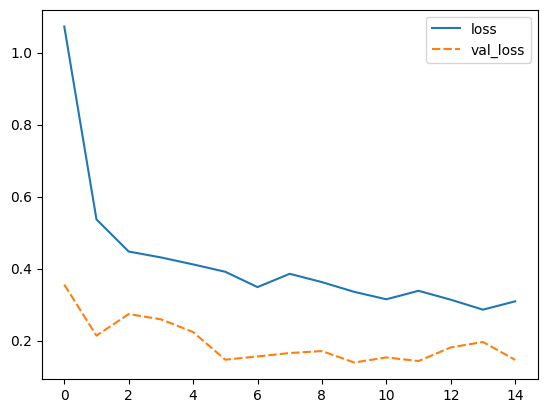

In [ ]:
import seaborn as sns
sns.lineplot(data=metrics[['loss', 'val_loss']])

<Axes: >

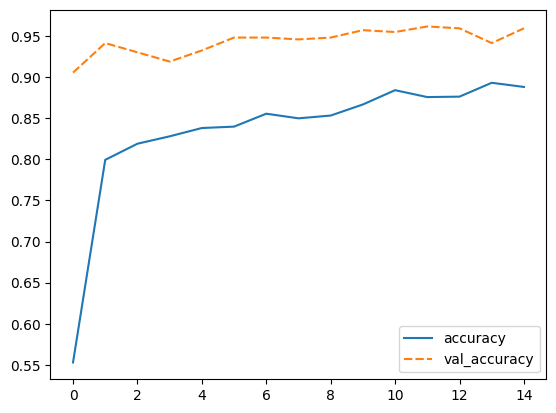

In [ ]:
sns.lineplot(data=metrics[['accuracy', 'val_accuracy']])

In [ ]:
model.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[1.9311913e-06, 9.9779749e-01, 6.0635807e-09, 1.9107372e-12,
        2.2006901e-03],
       [5.5229691e-05, 1.4239327e-04, 1.5236039e-07, 8.2040468e-05,
        9.9972016e-01],
       [7.3174504e-04, 6.8698596e-04, 2.2530019e-04, 9.5575869e-01,
        4.2597268e-02],
       ...,
       [3.9632610e-04, 4.4501363e-03, 1.6851169e-05, 6.1649567e-04,
        9.9452025e-01],
       [6.4725400e-12, 5.7081171e-09, 9.9992371e-01, 2.8613790e-06,
        7.3435505e-05],
       [2.2593291e-08, 3.0995213e-07, 9.9803060e-01, 4.4473840e-04,
        1.5243102e-03]], dtype=float32)

estas cosas son probabilidades de cada categoría y en este caso c/u debería tener 5 probabilidades

ahora lo convertimos en etiquetas y luego en matriz:

In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([1, 4, 3, 0, 4, 1, 1, 3, 0, 0, 1, 1, 3, 2, 0, 3, 0, 3, 2, 2, 0, 4,
       1, 1, 4, 4, 0, 1, 0, 3, 0, 2, 4, 1, 0, 1, 2, 1, 3, 4, 0, 0, 1, 4,
       1, 0, 4, 2, 4, 1, 4, 3, 4, 2, 4, 3, 0, 1, 1, 1, 1, 2, 3, 4, 2, 1,
       4, 2, 4, 1, 3, 2, 3, 4, 0, 2, 0, 1, 3, 2, 4, 3, 1, 2, 4, 2, 2, 1,
       2, 0, 0, 2, 2, 0, 3, 4, 2, 1, 0, 2, 0, 1, 1, 0, 1, 2, 1, 2, 2, 3,
       3, 1, 1, 3, 4, 2, 3, 0, 2, 2, 4, 2, 2, 1, 2, 4, 2, 0, 3, 1, 3, 1,
       3, 4, 2, 3, 1, 4, 3, 4, 2, 4, 4, 1, 1, 1, 2, 2, 1, 0, 3, 1, 0, 2,
       2, 2, 4, 3, 0, 0, 4, 4, 3, 4, 4, 3, 1, 3, 2, 2, 3, 2, 2, 3, 0, 2,
       4, 1, 4, 3, 2, 1, 0, 0, 0, 2, 0, 3, 3, 4, 1, 0, 4, 2, 4, 2, 1, 0,
       0, 3, 2, 1, 2, 0, 0, 0, 4, 4, 0, 4, 1, 2, 1, 3, 0, 3, 1, 1, 3, 3,
       4, 4, 4, 2, 4, 4, 4, 2, 1, 2, 4, 2, 0, 3, 1, 4, 4, 1, 1, 3, 4, 4,
       0, 1, 2, 0, 4, 1, 3, 1, 4, 4, 0, 2, 1, 4, 1, 2, 4, 4, 4, 2, 4, 1,
       0, 4, 4, 1, 2, 1, 4, 3, 2, 4, 1, 0, 1, 0, 0, 1, 4, 0, 3, 1, 2, 3,
       0, 3, 4, 3, 2, 2, 1, 3, 1, 0, 3, 1, 3, 3, 1,

In [ ]:
y_test = np.argmax(y_test, axis=-1)
y_test

array([1, 4, 3, 0, 4, 1, 1, 3, 0, 0, 1, 1, 3, 2, 0, 3, 0, 3, 2, 2, 0, 1,
       1, 1, 4, 4, 0, 1, 0, 3, 0, 2, 4, 1, 0, 1, 2, 1, 3, 1, 0, 0, 1, 4,
       1, 0, 4, 2, 4, 1, 4, 3, 4, 2, 4, 3, 0, 1, 1, 1, 1, 2, 3, 4, 2, 1,
       4, 2, 4, 1, 3, 2, 3, 1, 0, 2, 0, 1, 3, 2, 4, 3, 1, 2, 4, 2, 2, 0,
       4, 0, 0, 2, 2, 0, 3, 1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 2, 1, 2, 2, 3,
       3, 1, 1, 3, 4, 2, 3, 0, 2, 2, 4, 2, 2, 1, 2, 4, 2, 0, 3, 1, 3, 1,
       3, 4, 2, 4, 1, 4, 3, 4, 2, 4, 4, 1, 1, 1, 2, 2, 1, 0, 3, 4, 0, 2,
       2, 2, 4, 3, 0, 0, 4, 4, 3, 4, 4, 3, 1, 3, 2, 2, 3, 2, 2, 3, 0, 2,
       4, 1, 4, 3, 2, 1, 0, 0, 0, 2, 0, 3, 3, 4, 1, 0, 4, 2, 4, 2, 1, 0,
       0, 3, 2, 1, 2, 0, 0, 0, 4, 4, 0, 4, 1, 2, 1, 3, 3, 3, 1, 4, 3, 3,
       4, 4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 2, 0, 3, 1, 4, 4, 1, 1, 3, 1, 4,
       0, 0, 2, 3, 4, 1, 3, 1, 0, 4, 0, 2, 1, 4, 1, 2, 4, 4, 4, 2, 4, 1,
       0, 4, 4, 1, 2, 1, 4, 3, 2, 4, 1, 0, 1, 0, 0, 1, 4, 0, 3, 1, 2, 3,
       0, 3, 4, 3, 2, 2, 1, 3, 1, 0, 3, 1, 3, 3, 1,

In [ ]:
len(y_pred)
len(y_test)

445

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred,target_names=target_names))

               precision    recall  f1-score   support

         tech       0.97      0.95      0.96        87
     business       0.95      0.93      0.94       102
        sport       0.99      1.00      0.99        99
entertainment       0.96      0.97      0.96        66
     politics       0.92      0.93      0.93        91

     accuracy                           0.96       445
    macro avg       0.96      0.96      0.96       445
 weighted avg       0.96      0.96      0.96       445



<Axes: >

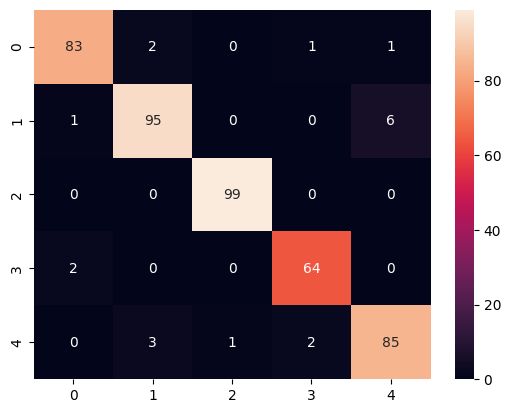

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),
            annot=True,
            fmt='.0f')

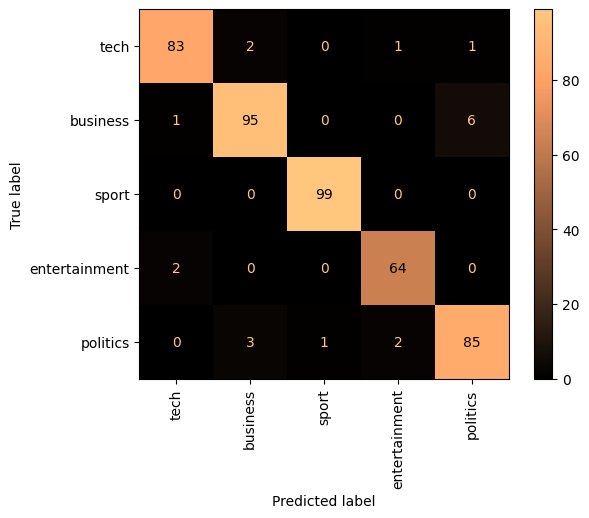

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,
                                        y_pred,
                                        display_labels=target_names,
                                        cmap='copper',
                                        xticks_rotation='vertical')

In [ ]:
def predecir(texto):
  texto = vectorize(texto)
  texto = texto.reshape(1,-1)
  texto = texto.reshape(1,-1,1) #ponemos una dimension extra pq es convucional

  print(f"""
  CATEGORIA.        PROBABILIDAD
  ==============================
  TECH: {texto[0][0]}
  BUSINESS: {texto[0][1]}
  SPORT: {texto[0][2]}
  ENTRETAINMENT: {texto[0][3]}
  POLITICS: {texto[0][4]}
  """)

In [ ]:
noticia = '''
Trump’s favorite F-word is getting a workout
“Election fraud. You’ve heard the term,” President Donald Trump told reporters at the White House on Tuesday as he signed a new executive order meant to safeguard US elections by requiring proof of citizenship to register to vote in every state.

Yes, we have heard the term. Over and over again. But we’re still looking for the proof.

Trump won two of the presidential elections in which he was a candidate, but he’s alleged election fraud in all three.

A special commission he set up to uncover election fraud during his first presidential term did not uncover any conspiracy or widespread evidence of fraud and was disbanded.

During his second presidential term, Trump isn’t bothering with trying to identify election fraud; he’s simply moving forward with plans to change the system anyway.

“Fraud,” nebulous and unprovable, has turned into Trump’s go-to justification not only for modifying election procedures, but also for his larger designs to shrink the federal government.

‘Waste, fraud and abuse’
Trump promised during his presidential campaign that Social Security, Medicare and Medicaid benefits would not be touched. But now, he argues that “waste, fraud and abuse” require taking a hard look at those programs.

Trump and Elon Musk have both repeatedly argued, by misrepresenting the data in a government database of Social Security numbers, that many millions of very, very old people might be fraudulently getting benefits. Never mind that the more appropriate data set suggested a problem a fraction of that size.

Musk, writes CNN’s Tami Luhby, is “on the hunt for fraud” at the Social Security Administration. His Department of Government Efficiency unleashed chaos at the agency that provides benefits to 73 million Americans when it announced a new policy to require in-person visits from people who could not verify their identity online.

The agency, which like most of the federal government is already reeling from Musk’s efforts to cull the size of the federal workforce, would have been crushed by people showing up at understaffed Social Security Administration Offices. This week, it announced it would delay the policy rollout until April 14 and limit the new requirement to only those filing for retirement, survivors or family benefits.

Preventing fraud was also the stated reason for the Social Security Administration clamping down on those trying to change their bank account information over the phone. Read Luhby’s full report.

DOGE cuts and ‘fraud’
Defending cuts by DOGE, Trump said during his speech to Congress last month that the group, staffed, he said, by “intelligent, mostly young people,” has “found hundreds of billions of dollars of fraud.”

That claim of uncovered fraud has been impossible to substantiate since DOGE has worked largely in secret, and the claims of savings made on its website have been repeatedly shown to double-count and miscount the value of cuts.

More importantly, neither DOGE nor the White House has documented how cut programs and contracts were fraudulent. They were clearly part of programs the administration disagreed with, but a policy difference is a different thing than fraud, which is a crime. Trump knows this because his company was found guilty of criminal tax fraud in 2022 and he was found liable for civil tax fraud in New York last year.

Included in the staff and programming cuts at many agencies have been government watchdogs such as inspectors general, the very stopgaps in place to prevent fraud. This issue is playing out on a larger scale at the IRS, where thousands of workers are facing termination during tax filing season.

Elon Musk alleges a broad ‘entitlements fraud’ by Democrats
Musk has pushed a conspiracy theory, which is not supported by any factual evidence, that Democrats are using “entitlements fraud” as a magnet to bring immigrants into the country illegally and turn them into voters. We’ve previously pointed out the many holes in that particular theory, but suffice it to say there is no current viable path to citizenship (and therefore voting) for the undocumented.

Election fraud, revisited
There’s still no evidence of widespread election fraud, despite Trump’s unending claims, but this new executive action, he said, would “end it, hopefully.”

The order seeks to add a proof of citizenship requirement to the federal voter registration template used by states. It also seeks to give Musk’s DOGE access to state voter rolls.

Expect court battles. Critics argue voting by noncitizens is already illegal and has never been shown to be a major problem. Requiring proof of citizenship, they contend, is a hindrance to poor people and the elderly, who might not have access to a passport or other specific document.

Some states already share voter information, but streamlining a national database could violate the Constitution’s guidance that states should run their own elections and run the risk of purging naturalized citizens, in particular.

Read more on Trump’s election integrity executive order from CNN’s Tierney Sneed and Ethan Cohen.

Even if Trump’s executive order withstands an expected court challenge, and even if there ends up being a new nationwide requirement to provide documentation of citizenship before registering to vote, Trump has created an insert-allegation-of-fraud-here template for future candidates and presidents. You will hear the term “election fraud” again.

'''

In [ ]:
predecir(noticia)


  CATEGORIA.        PROBABILIDAD
  TECH: [-0.14035225]
  BUSINESS: [0.07661763]
  SPORT: [0.0189174]
  ENTRETAINMENT: [-0.02053444]
  POLITICS: [-0.06517986]
  


In [ ]:
noticia2 = """
​Selena Gomez and Benny Blanco have been in a relationship since December 2023, and their bond has only deepened over time. In a February 2024 interview, Gomez expressed that her relationship with Blanco is "the safest that I feel," highlighting the mutual respect and understanding they share. ​
In December 2024, the couple announced their engagement, sharing the joyous news with fans through heartfelt social media posts. Gomez has since revealed that her "Only Murders in the Building" co-star, Martin Short, will deliver a speech at their wedding, adding a personal touch to the upcoming ceremony. ​
Throughout their relationship, Gomez and Blanco have collaborated professionally, including the release of their joint album, "I Said I Love You First." Their partnership exemplifies a harmonious blend of personal and professional synergy, resonating with fans and industry peers alike.
"""

In [ ]:
predecir(noticia2)


  CATEGORIA.        PROBABILIDAD
  TECH: [-0.08032865]
  BUSINESS: [0.16927701]
  SPORT: [0.06404106]
  ENTRETAINMENT: [0.04772504]
  POLITICS: [0.0529244]
  
